In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import DistanceMetric

In [8]:
df = pd.read_csv('heart.csv')

## Removing Outliers

<AxesSubplot:>

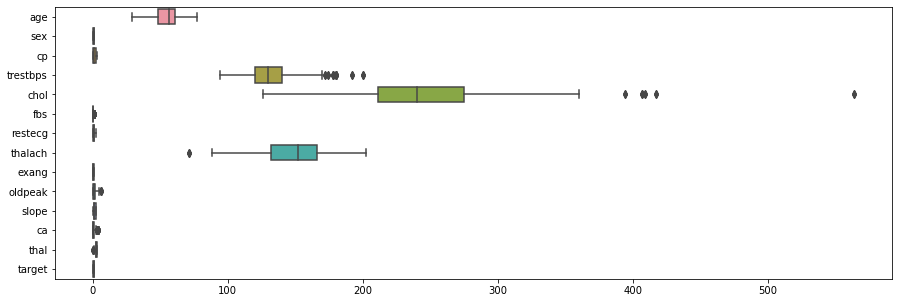

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')

In [10]:
q1 = df.chol.quantile(0.25)
q3 = df.chol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df=df[df["chol"] < upper_limit]

In [11]:
q1 = df.trestbps.quantile(0.25)
q3 = df.trestbps.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df=df[df["trestbps"] < upper_limit]

In [12]:
q1 = df.thalach.quantile(0.25)
q3 = df.thalach.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
df=df[df["thalach"] > lower_limit]

In [14]:
oldpeak_q1 = df.oldpeak.quantile(0.25)
oldpeak_q3 = df.oldpeak.quantile(0.75)
oldpeak_IQR = oldpeak_q3 - oldpeak_q1
oldpeak_lower_limit = oldpeak_q1 - 1.5 * oldpeak_IQR
oldpeak_upper_limit = oldpeak_q3 + 1.5 * oldpeak_IQR
df=df[df["oldpeak"] < oldpeak_upper_limit]

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<AxesSubplot:>

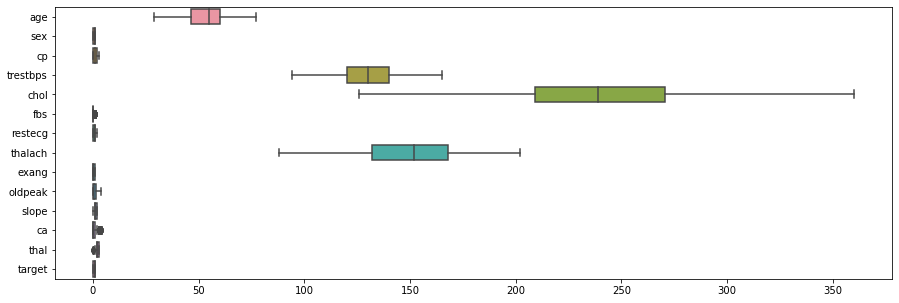

In [15]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')

## Splitting Data

In [20]:
y = df["target"]
x = df.drop("target", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

## Scaling Data

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Our Models



#### K Nearest Neighbor

In [43]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [44]:
knn_parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14, 15], 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'), 'p':[1, 2, 3, 4, 5], 'metric': ('minkowski', 'euclidean', 'manhattan', 'chebyshev', 'wminkowski', 'seuclidean', 'mahalanobis') }

In [45]:
knn_gs = GridSearchCV(KNN(), knn_parameters, scoring = 'recall')

In [46]:
knn_gs.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'metric': ('minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'wminkowski', 'seuclidean',
                                    'mahalanobis'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [48]:
knn_gs.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 3,
 'weights': 'uniform'}

In [66]:
KNN_Model = KNN(n_neighbors=7, weights='distance')

In [68]:
KNN_Model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [69]:
KNN_yhat = KNN_Model.predict(x_test)

<AxesSubplot:>

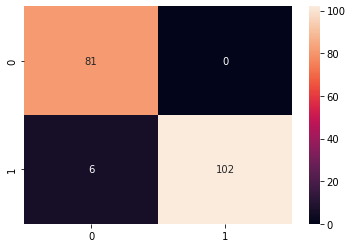

In [70]:
sns.heatmap(confusion_matrix(y_test,KNN_yhat),annot=True, fmt='g')

In [78]:
print('Recall score for the KNN model is ' + 
str(recall_score(y_test,KNN_yhat)))

Recall score for the KNN model is 0.9444444444444444


**Talk about how the model works** <br>
K-Nearest Neighbor is a supervised machine learning algorithm that can be used for classification and regression problems. When a data point is given to the algorithm, it then calculates the distance between the given point to the other data points, mostly using Euclidian distance. The nearest “neighbors'' or data points to the given data point are then sorted by distance in increasing order. The data point is then classified among its “k” nearest neighbors. A small “k” value is more accurate but causes overfitting.

**Talk about how each model performs and which hyperparameters exist for each model** <br>
n = 7: prevent overfitting <br>
weights = "distance": makes sure data points closer to the data are more relevant to classification <br>
metric = "minkowski" and p = 2: utilizes Euclidian distance (default) <br>
algorithm = "auto": will attempt to decide the most appropriate algorithm based on the values passed to fit method. (default) <br>

#### Extreme Gradient Boost

In [60]:
from xgboost import XGBClassifier

In [61]:
xgb_parameters = {'booster':['gblinear', 'gbtree'], 'max_depth':([1, 40]), 'sampling_method':['uniform', 'gradient_based']}

In [72]:
xgb_gs = GridSearchCV(XGBClassifier(verbosity = 0), xgb_parameters, scoring = 'recall')
xgb_gs.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'booster': ['gblinear', 'gbtree'],
                         'max_depth': [1, 40],
                         'sampling_method': ['uniform', 'gradient_based']},
             scoring='recall')

In [74]:
xgb_gs.best_params_

{'booster': 'gbtree', 'max_depth': 40, 'sampling_method': 'uniform'}

In [91]:
xgb_pred = xgb_gs.predict(x_test)

<AxesSubplot:>

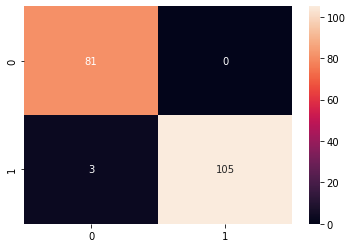

In [93]:
xgb_y_hat = xgb_gs_updated.predict(x_test)
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='g')

In [94]:
print('Recall score for the XGB model is ' + 
str(recall_score(y_test,xgb_pred)))

Recall score for the XGB model is 0.9722222222222222


Extreme Gradient Boosting, or EGB, is a supervised machine learning program that combines many other models, often times weaker models, into its own highly accurate model. EGB is similar to random forest and decision tree models, in the way that each of the models making up EGB makes 1 big tree 
model with thousands of trees. EGB converts all categorical data into one\-hot encoding, which
basically means it prepares the data for the algorithm by assigning the categories 1s and 0s.



<u>Edited Parameters</u>

booster = 'gbtree':  decides what kind of model is used; gbtree \(default\) and dart utilize tree\-based models while gblinear uses linear ones

max\_depth = 40: indicates the depth of the tree, and increasing the value makes the model more complex and increases its chances to overfit \(0 means no limit and 6 is the default\)

sampling\_method = 'uniform': decides how to sample the training instances; uniform makes it so that every instance has an equal probability of being chosen while gradient\_based made it so that
the selection probability would be proportional to the 
"regularized absolute value of gradients."



#### Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_parameters = {'n_estimators':(50, 100), 'bootstrap':(True, False), 'min_samples_leaf':(5, 10), 'oob_score':(True, False), 'warm_start':(True, False)}

In [84]:
rf_gs = GridSearchCV(RandomForestClassifier(), rf_parameters, scoring = 'recall')
rf_gs.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': (True, False),
                         'min_samples_leaf': (5, 10), 'n_estimators': (50, 100),
                         'oob_score': (True, False),
                         'warm_start': (True, False)},
             scoring='recall')

In [85]:
rf_gs.best_params_

{'bootstrap': False,
 'min_samples_leaf': 5,
 'n_estimators': 50,
 'oob_score': False,
 'warm_start': True}

In [86]:
rf_gs.best_score_

0.9697468354430379

In [87]:
rf_pred = rf_gs.predict(x_test)

<AxesSubplot:>

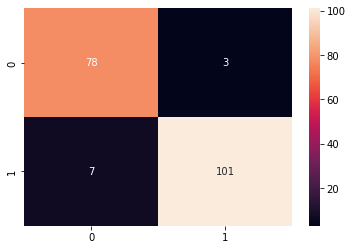

In [88]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='g')

In [89]:
recall_score(y_test, rf_pred)

0.9351851851851852

<u>**Recall Score**</u>

Our recall score is about .935, rounded, and indicates that the number of true positives and negatives are significantly greater than the number of false positives and negatives. The model is detecting over 90% of what it could have predicted correctly, which means it is extremely accurate. 


<u>**Random Forest Classifier**</u>

The Random Forest Classifier is an algorithm that is a meta estimator that takes a certain number of decision tree classifiers onto various sub\-samples of a data set, and uses the mean of the results to determine and improve predictive accuracy.


<u>**Parameters Used:**</u>

bootstrap \(False\): This parameter decides whether bootstrap samples are being used when building the decision trees, when set to False the entire dataset is used to build each tree.

min\_samples\_leaf \(5\): The minimum number of samples requried to be at leaf node,  and can result in the effect of smoothing the model. 

n\_estimators \(50\): The number of trees in a forest. 

oob\_score \(False\): whether to use default samples to estimate a score.

warm\_start \(True\): reuse the solutions of the previous tree call to fit and add more estimators to the ensemble, otherwise, just do a new forest.

